In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###  MicroGrad demo

In [12]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [11]:
np.random.seed(1337)
random.seed(1337)

[0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1]


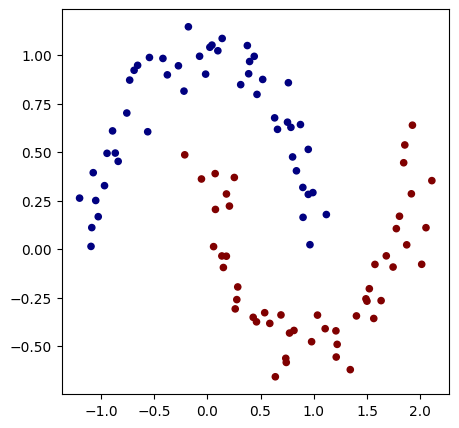

In [2]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = ((y*2 - 1) > 0).astype(int) # make y be 0 or 1
# y = y*2 - 1
print(y)
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [ ]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

In [ ]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

In [10]:
# optimization
for k in range(95):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


step 0 loss 1.4737951507825648, accuracy 46.0%
step 1 loss 1.7397924144616195, accuracy 50.0%
step 2 loss 1.8206122781153593, accuracy 67.0%
step 3 loss 1.0715458205411392, accuracy 52.0%
step 4 loss 1.0035005012264948, accuracy 79.0%
step 5 loss 0.49581494920195474, accuracy 79.0%
step 6 loss 0.4134369081663982, accuracy 80.0%
step 7 loss 0.3843280774482433, accuracy 82.0%
step 8 loss 0.37180696922062256, accuracy 82.0%
step 9 loss 0.36371488445220246, accuracy 83.0%
step 10 loss 0.3474544544821721, accuracy 83.0%
step 11 loss 0.33491565732026596, accuracy 84.0%
step 12 loss 0.32494784816135425, accuracy 88.0%
step 13 loss 0.3155819733973349, accuracy 91.0%
step 14 loss 0.3040762907718024, accuracy 90.0%
step 15 loss 0.2910038538262579, accuracy 90.0%
step 16 loss 0.27879763546710973, accuracy 90.0%
step 17 loss 0.26680232494029144, accuracy 91.0%
step 18 loss 0.2552205638950674, accuracy 91.0%
step 19 loss 0.24169076460033456, accuracy 93.0%
step 20 loss 0.22784070725212127, accuracy

x_min = -2.112476948952046, x_max = 3.170864810851098, y_min = -1.7187998335823138, and y_max = 2.1496710019223486

xx.shape = (16, 22), yy.shape = (16, 22)

Xmesh.shape = (352, 2)

len(inputs) = 352
len(scores) = 352

scores[0].data = -0.7733875121910689

Z.shape = (16, 22)



(-1.7187998335823138, 2.031200166417686)

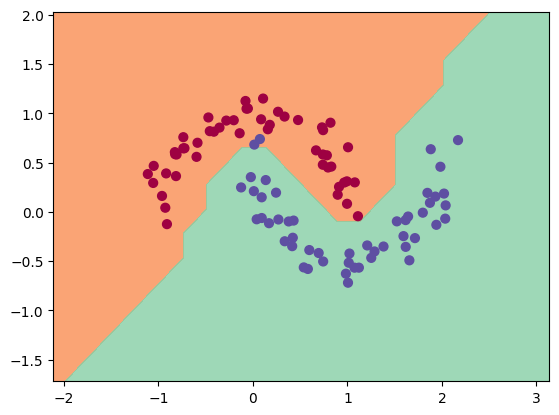

In [12]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

print(f"{x_min = }, {x_max = }, {y_min = }, and {y_max = }")
print()

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

print(f"{xx.shape = }, {yy.shape = }")
print()

Xmesh = np.c_[xx.ravel(), yy.ravel()]
print(f"{Xmesh.shape = }")
print()

inputs = [list(map(Value, xrow)) for xrow in Xmesh]
print(f"{len(inputs) = }")
scores = list(map(model, inputs))
print(f"{len(scores) = }")
print()

print(f"{scores[0].data = }")
print()

# make Z 2D
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

print(f"{Z.shape = }")
print()

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


## trying his data with my model

In [2]:
from macrograd.engine import Tensor
from macrograd.nn import MLP_macro

In [3]:
model_min = MLP_macro(2, [16, 16, 2]) # 2-layer neural network


In [4]:
def softmax_loss(scores, y, stabalize=False, alpha=0):
    m = len(y.array)
    Z = scores
    if stabalize:
        Z = Tensor(Z.array - np.max(Z.array, axis = 1, keepdims=True))
    exp_Z = Z.exp()
    # exp_Z = (16, 2)
    # previous implementation broke down here. Could not do (16, 1) --> (16, 2). Went to (16, 16) instead. 
    softmax_probs = exp_Z / exp_Z.summation(axes=(1,)).reshape((exp_Z.array.shape[0], 1)).BroadcastTo((exp_Z.array.shape))
    
    # one hot encode y
    y_a = y.array
    num_classes = scores.array.shape[1]
    y_one_hot_encoding = np.zeros((y_a.shape[0], num_classes))
    y_one_hot_encoding[np.arange(y_a.shape[0]), y_a.flatten()] = 1
    
    log_t = softmax_probs.log() * Tensor(y_one_hot_encoding)
    loss = - log_t.summation(axes=None) / m

    if alpha != 0:
        reg_loss = alpha * sum([(p.array*p.array).sum() for p in model.parameters()])
        loss += reg_loss

    preds = np.argmax(softmax_probs.array, axis=1)
    accuracy = np.sum(y.array.flatten() == preds) / m

    return loss, accuracy


In [6]:
def train(X, y, epochs=60, batch_size=None):
    for k in range(epochs):
        if batch_size is None:
            X_batch, y_batch = X, y
        else:
            ri = np.random.permutation(X.shape[0])[:batch_size]
            X_batch, y_batch = X[ri], y[ri]
        inputs = Tensor(np.array([xrow for xrow in X_batch]))
        y_batch = Tensor(np.array(y_batch).reshape(-1, 1))

        # print(f"{inputs.array.shape = }")
        # print(f"{y_batch.array.shape = }")

        # forward the model to get scores
        scores = model_min(inputs)
        # forward
        total_loss, acc = softmax_loss(scores, y_batch)
        
        # backward
        model_min.zero_grad()
        total_loss.backward()

        # update (sgd)
        # finetune the learning rate. harcoded decay: at step 30, decreasee the lr. at step 70 decrease lr. 
        # this way you force the model to local minimum
        learning_rate = 1.0 - 0.9*k/100
        for p in model_min.parameters():
            # print(f"{np.linalg.norm(p.grad) = }")
            if batch_size is not None:
                p.array -= learning_rate * 1/ batch_size * p.grad
            else:
                p.array -= learning_rate * p.grad
        
        if k % 10 == 0:
            # preds = np.argmax(scores.array, axis = 1)
            # print(f"preds are {preds.reshape(1, -1)}, should be {y_batch.array.reshape(1, -1)}")
            print(f"step {k} loss {total_loss.array}, accuracy {acc*100}%")
train(X, y, 130)
# don't use batching. 

step 0 loss 0.8885495327090202, accuracy 50.0%
step 10 loss 0.2686733296252054, accuracy 89.0%
step 20 loss 0.2241923308602428, accuracy 89.0%
step 30 loss 0.1890176763155107, accuracy 91.0%
step 40 loss 0.1461420120204224, accuracy 94.0%
step 50 loss 0.11305147902457431, accuracy 96.0%
step 60 loss 0.0880581595323786, accuracy 98.0%
step 70 loss 0.07138330193831044, accuracy 99.0%
step 80 loss 0.060454287946812554, accuracy 99.0%
step 90 loss 0.053500147042526126, accuracy 99.0%
step 100 loss 0.04959599346576023, accuracy 100.0%
step 110 loss 0.048142104807987564, accuracy 100.0%
step 120 loss 0.048903247651058045, accuracy 100.0%


Ploting decision boundary:

x_min = -2.199749591193916, x_max = 3.1091531525771785, y_min = -1.6580186255169331, and y_max = 2.1466003211620235


(-1.6580186255169331, 2.091981374483067)

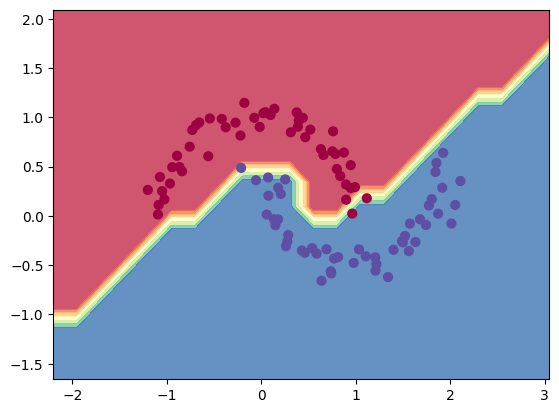

In [7]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

print(f"{x_min = }, {x_max = }, {y_min = }, and {y_max = }")

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Xmesh = np.c_[xx.ravel(), yy.ravel()]

inputs = Tensor(np.array([xrow for xrow in Xmesh]))
scores = model_min(inputs)


# make Z 2D
Z = np.argmax(scores.array, axis = 1).reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


As a side node, model does not perform well with batching. It is all over the place: 

In [10]:
train(X, y, 120, 16)
# don't use batching. 

step 0 loss 0.38356474095388904, accuracy 87.5%
step 10 loss 0.2506962037559622, accuracy 87.5%
step 20 loss 0.23371484422834468, accuracy 81.25%
step 30 loss 0.1770660173396358, accuracy 87.5%
step 40 loss 0.17483408501435066, accuracy 93.75%
step 50 loss 0.08291804611954998, accuracy 100.0%
step 60 loss 0.07766405193750953, accuracy 100.0%
step 70 loss 0.15241796443834205, accuracy 100.0%
step 80 loss 0.08514242599138536, accuracy 100.0%
step 90 loss 0.11256290343582265, accuracy 100.0%
step 100 loss 0.14852490365427268, accuracy 93.75%
step 110 loss 0.2407031893671904, accuracy 87.5%


# MNIST with macrograd

In [2]:
# don't even use pytorch

import torch  # install pytorch and then download MNIST
from torchvision import datasets, transforms

# transform example said to do: https://github.com/pytorch/examples/blob/main/mnist/main.py#L7
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [ ]:
# flatten the images
def flatten_images(images_array):
    prod = 1
    shape_of_arr = list(images_array.shape)
    for i in range(1, len(shape_of_arr)):
        prod *= shape_of_arr[i]
    return images_array.reshape(images_array.shape[0], prod)

mnist_trainset.data = flatten_images(mnist_trainset.data)
mnist_testset.data = flatten_images(mnist_testset.data)

print(f"{len(mnist_trainset) = }")
print(f"{len(mnist_testset) = }")
print(f"{mnist_trainset.data.shape = }")
print(f"{mnist_trainset[0] = }")
print(f"{mnist_trainset.targets[0] = }")
print(f"{mnist_testset.data.shape = }")

b_s = 64

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=b_s, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=b_s, shuffle=False)




In [4]:
from macrograd.engine import Tensor
from macrograd.nn import MLP_macro

In [5]:
model_mnist = MLP_macro(28*28, [10, 10, 10]) # 2-layer neural network

In [6]:
def softmax_loss(scores, y, stabalize=False, alpha=0):
    m = len(y.array)
    Z = scores
    if stabalize:
        Z = Tensor(Z.array - np.max(Z.array, axis = 1, keepdims=True), (Z,))
    exp_Z = Z.exp()
    # exp_Z = (16, 2)
    # previous implementation broke down here. Could not do (16, 1) --> (16, 2). Went to (16, 16) instead. 
    softmax_probs = exp_Z / exp_Z.summation(axes=(1,)).reshape((exp_Z.array.shape[0], 1)).BroadcastTo((exp_Z.array.shape))
    
    # one hot encode y
    y_a = y.array
    num_classes = scores.array.shape[1]
    y_one_hot_encoding = np.zeros((y_a.shape[0], num_classes))
    y_one_hot_encoding[np.arange(y_a.shape[0]), y_a.flatten()] = 1
    
    log_t = softmax_probs.log() * Tensor(y_one_hot_encoding)
    loss = - log_t.summation(axes=None) / m # taking the mean, so do not need to divide by batch size

    if alpha != 0:
        reg_loss = alpha * sum([(p.array*p.array).sum() for p in model.parameters()])
        loss += reg_loss

    preds = np.argmax(softmax_probs.array, axis=1)
    accuracy = np.sum(y.array.flatten() == preds) / m

    return loss, accuracy


In [7]:
def train(epochs=60):
    for k in range(epochs):
        overall_loss = 0
        overall_accuracy = 0
        total_examples = 0
        for images, labels in train_loader:
            model_mnist.zero_grad()
            X_batch_array = images.numpy()
            X_batch_array = flatten_images(X_batch_array)
            y_batch_array = labels.numpy()
            y_batch_array = flatten_images(y_batch_array)

            X_batch = Tensor(X_batch_array)
            y_batch = Tensor(y_batch_array)

            # forward the model to get scores
            scores = model_mnist(X_batch)
            # forward
            total_loss, acc = softmax_loss(scores, y_batch)
            
            # backward
            # import pdb; pdb.set_trace()
            total_loss.backward()

            # update (sgd)
            learning_rate = 0.001
            for p in model_mnist.parameters():
                p.array -= learning_rate * p.grad
            
            overall_loss += total_loss.array * len(X_batch.array)
            overall_accuracy += acc * len(X_batch.array)
            total_examples += len(X_batch.array)

        print(f"step {k} loss {overall_loss / total_examples}, !!!!!!!!!!!!!!!!!! accuracy {(overall_accuracy / total_examples)*100}%")
train(epochs=100)


step 0 loss 1.9957945903424819, !!!!!!!!!!!!!!!!!! accuracy 26.490000000000002%
step 1 loss 1.4441901663444834, !!!!!!!!!!!!!!!!!! accuracy 51.218333333333334%
step 2 loss 1.1718638773177392, !!!!!!!!!!!!!!!!!! accuracy 62.81%
step 3 loss 0.9698925753824572, !!!!!!!!!!!!!!!!!! accuracy 69.865%
step 4 loss 0.8272095719028705, !!!!!!!!!!!!!!!!!! accuracy 74.56666666666666%
step 5 loss 0.7273321499417825, !!!!!!!!!!!!!!!!!! accuracy 78.04166666666667%
step 6 loss 0.6498697227500009, !!!!!!!!!!!!!!!!!! accuracy 81.62666666666667%
step 7 loss 0.5872648659736482, !!!!!!!!!!!!!!!!!! accuracy 83.83500000000001%
step 8 loss 0.5373558633879661, !!!!!!!!!!!!!!!!!! accuracy 85.075%
step 9 loss 0.4987784350417057, !!!!!!!!!!!!!!!!!! accuracy 86.17833333333334%
step 10 loss 0.4689015359296318, !!!!!!!!!!!!!!!!!! accuracy 86.98333333333333%
step 11 loss 0.44473728668996343, !!!!!!!!!!!!!!!!!! accuracy 87.53%
step 12 loss 0.42503408183349317, !!!!!!!!!!!!!!!!!! accuracy 88.09166666666667%
step 13 loss